<div style="background-color: #103778; 
            color: white; 
            padding: 10px; 
            text-align: center;
            font-size: 20px;">
    <h1>PARTE II</h1>
</div>

Agora que os dados foram tratados e a Análise Exploratória (EDA) foi concluída, partimos para a etapa de construção do modelo preditivo.

O modelo de previsão de tempo de entrega é um componente estratégico em operações de delivery, pois permite gerenciar as expectativas dos clientes, otimizar a logística e aumentar a fidelização. Estimativas mais precisas contribuem para a construção de confiança, reduzem reclamações e apoiam decisões operacionais, como alocação de entregadores e planejamento de rotas.

Neste projeto, o objetivo é prever um valor numérico contínuo (tempo de entrega). Para esse tipo de problema, a abordagem mais indicada é a utilização de modelos de **Regressão**.

Modelos de Regressão buscam aprender uma função matemática que descreva a relação entre as variáveis independentes por exemplo, distância, tipo de veículo, características do pedido e a variável alvo, tempo de entrega. O desempenho desses modelos é avaliado com base na capacidade de generalizar bem para dados não vistos, minimizando o erro de previsão.

Serão avaliados diferentes algoritmos de Regressão, com características distintas de complexidade e capacidade de modelagem:
- Regressão Linear; 
- Random Forest Regressor; 
- LightGBM;
- XGBoost;
- CatBoost;

Ao final, os modelos serão comparados por meio de métricas de avaliação apropriadas para problemas de regressão, a fim de identificar aquele que apresenta o melhor desempenho para o contexto do problema.

## Importando Bibliotecas e Dataset

In [1]:
# Import das Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import utils.model as ml

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importanto o dataset de treino
df_treino = pd.read_csv('data/data_modelo.csv', sep = ',')

display(df_treino)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,...,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Avaliacao,vehicle_ratio,mean_distance_driver,mean_distance_order,mean_distance_rating
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,...,0,0,0,0,1,3,0.582301,10.506969,9.806712,9.497729
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,...,1,0,0,0,1,2,0.335302,11.249514,9.806712,10.181421
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,...,0,0,1,0,0,2,0.579375,9.396230,9.710204,10.181421
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,...,0,1,0,0,0,3,0.588258,10.821467,9.677144,9.497729
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,...,1,0,0,0,1,3,0.335302,9.036788,9.806712,9.497729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41468,1178,RANCHIRES16DEL01,35,4.2,23.371292,85.327872,23.481292,85.437872,Drinks,motorcycle,...,0,0,1,0,0,2,0.579375,8.766654,9.710204,10.181421
41469,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,...,0,0,0,1,0,3,0.583398,8.361523,9.657065,9.497729
41470,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,...,1,0,1,0,0,3,0.336751,8.983493,9.710204,9.497729
41471,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,...,0,0,0,0,1,3,0.582301,9.141467,9.806712,9.497729


Excluindo as features que não serão usadas

In [3]:
# Elimina as colunas que não serão utilizadas
df_treino = df_treino.drop(['ID', 'Delivery_person_ID', 'Type_of_order', 'Type_of_vehicle', 'rating_categoria'], axis=1)

In [4]:
display(df_treino)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Distance,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,...,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Avaliacao,vehicle_ratio,mean_distance_driver,mean_distance_order,mean_distance_rating
0,37,4.9,22.745049,75.892471,22.765049,75.912471,24,3.023250,0,0,...,0,0,0,0,1,3,0.582301,10.506969,9.806712,9.497729
1,34,4.5,12.913041,77.683237,13.043041,77.813237,33,20.170858,0,0,...,1,0,0,0,1,2,0.335302,11.249514,9.806712,10.181421
2,23,4.4,12.914264,77.678400,12.924264,77.688400,26,1.551783,0,0,...,0,0,1,0,0,2,0.579375,9.396230,9.710204,10.181421
3,38,4.7,11.003669,76.976494,11.053669,77.026494,21,7.785510,0,0,...,0,1,0,0,0,3,0.588258,10.821467,9.677144,9.497729
4,32,4.6,12.972793,80.249982,13.012793,80.289982,30,6.206239,0,0,...,1,0,0,0,1,3,0.335302,9.036788,9.806712,9.497729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41468,35,4.2,23.371292,85.327872,23.481292,85.437872,33,16.589850,0,0,...,0,0,1,0,0,2,0.579375,8.766654,9.710204,10.181421
41469,30,4.8,26.902328,75.794257,26.912328,75.804257,32,1.488910,0,0,...,0,0,0,1,0,3,0.583398,8.361523,9.657065,9.497729
41470,30,4.9,13.022394,80.242439,13.052394,80.272439,16,4.654271,0,0,...,1,0,1,0,0,3,0.336751,8.983493,9.710204,9.497729
41471,20,4.7,11.001753,76.986241,11.041753,77.026241,26,6.228480,0,0,...,0,0,0,0,1,3,0.582301,9.141467,9.806712,9.497729


<div style="background-color: #103778; 
            color: white; 
            padding: 10px; 
            text-align: center;
            font-size: 20px;">
    <h1>Divisão em Treino e Teste</h1>
</div>

In [5]:
# Divisão entre treino e teste
from sklearn.model_selection import train_test_split

# Divisão entre target e o que será usado no modelo
X = df_treino.drop(['Time_taken(min)'], axis=1)
y = df_treino['Time_taken(min)']

# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Funções que usarei para treinar e avaliar o modelo.

In [ ]:
# Função de Treinamento e Gráficos
def treinar_modelo(modelo, X_train, y_train, y_test, titulo):
    """
    Treina o modelo. calcula previsões e reterno com graficos 
    """

    # Treino
    modelo.fit(X_train, y_train)

    # Previsão
    y_pred = modelo.predict(X_test)

    # Criação dos gráficos
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    # Título central da figura
    fig.suptitle(
        #'Avaliação do Modelo — {modelo.__class__.name__}',
        titulo,
        fontsize=16,
        fontweight='bold'
    )

    # Gráfico 1 — Predito vs Real
    ax[0].scatter(y_test, y_pred, alpha=0.6)
    ax[0].plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        linestyle='--',
        color='r'
    )

    ax[0].set_xlabel('Tempo Real (min)')
    ax[0].set_ylabel('Tempo Predito (min)')
    ax[0].set_title('Predito vs Real')


    # Gráfico 2 — Resíduos vs Valor Real
    residuos = y_test - y_pred

    ax[1].scatter(y_test, residuos, alpha=0.6)
    ax[1].axhline(0, linestyle='--', color='r')

    ax[1].set_xlabel('Tempo Real (min)')
    ax[1].set_ylabel('Resíduo')
    ax[1].set_title('Resíduos vs Valor Real')


    # Gráfico 3 — Distribuição dos Resíduos
    sns.histplot(
        residuos,
        bins=30,
        kde=True,
        alpha=0.7,
        ax=ax[2]       
    )

    ax[2].set_xlabel('Resíduo')
    ax[2].set_ylabel('Frequência')
    ax[2].set_title('Distribuição dos Resíduos')


    plt.tight_layout()
    plt.show()

<div style="background-color: #103778; 
            color: white; 
            padding: 10px; 
            text-align: center;
            font-size: 20px;">
    <h1>1. Treinamento do Modelo</h1>
</div>

In [ ]:
df_metricas = ml.train_and_compare_models(X_train, X_test, y_train, y_test)

,Modelo,MAE,MSE,RMSE,R²,R² Ajustado,MAPE (%),RMSLE
0,Regressão Linear,6.147,60.240,7.761,0.314,0.313,27.255,0.090
1,LightGBM,5.657,51.847,7.200,0.409,0.408,25.048,0.079
2,Random Forest Regressor,5.939,57.434,7.579,0.346,0.345,26.252,0.086
3,XGBoost,5.809,54.758,7.400,0.376,0.375,25.624,0.083
4,CatBoost,5.700,52.663,7.257,0.400,0.399,25.184,0.080


<div style="background-color: #103778; 
            color: white; 
            padding: 10px; 
            text-align: center;
            font-size: 20px;">
    <h1>2. Métricas de Avaliação</h1>
</div>

Para saber se nosso modelo teve ou não um bom resultado é preciso entender como as métricas de avaliação de um modelo de regressão funcionam o que eles nos dizem sobre o resultado obtido. Aqui usei as seguintes métricas.
- MAE
- MSE
- RMSE
- R²
- R² Ajustado
- MAPE (%)
- RMSLE

## MAE (Erro Absoluto Médio)
Calcula a média das distâncias entre valores preditos e reais. Apresenta valor mínimo 0 e não tem valor máximo.

## MSE (Erro Quadrático Médio) 
Consiste na média do erro das previsões ao quadrado, ou seja, ele calcula a diferença entre o valor predito pelo modelo e o valor real, eleva-se o resultado ao quadrado, faz-se a mesma coisa com todos os elementos, soma-os, e dividi-se pelo número de elementos preditos. Quanto maior esse número, pior o modelo, essa métrica tem valor mínimo 0.

## RMSE (Raiz do Erro Quadrático) 
Como o MSE eleva o resultado ao quadrado, isso penaliza predições com valores muito. Então surgi o RMSE que calcula a raiz quadrada do MSE, diminuindo a penalidade de predições de valores muito distantes da real.

## R²
Também chamado de **Coeficiente de Determinação**, ela expressa a quantidade de variança dos dados que é explicado pelo modelo, ou seja, ela nos diz qual a porcentagem da variança que pôde ser prevista pelo modelo e, portanto, o quão próximo as medidas reais estão do nosso modelo. Seu **valor varia de 0 a 1**. Entretanto ele é um resultado enviesado.

Por exemplo: um R² = 35% nos diz que 35% da variância de nossos dados podem ser explicados pelo modelo construído.

## R² Ajustado
Essa métrica busca representar a porcentagem da variança que o modelo pode ter, entretando, esse valor não demonstra um viés devido ao acréscimo de dados ou features do modelo, como ocorre com o R².

## MAPE (Erro Percentual Absoluto Médio)
Ela é representada por meio de porcentagem, obtida através da divisão da diferença entre o valor predito e o real pelo valor real. **Quanto menor o valor, mais preciso será o modelo de regressão**.

Por exemplo: Um MAPE = 10% significa que, em média, o modelo faz previsões que erram por 10% do valor real.

## RMSLE (Raiz do Erro Médio Quadrático e Logarítmico)
Muito parecido com o RMSE, entretanto, a aplicação de logatitmos ocorre na intenção de evitar a penalização de diferenças elevadas entre o valor predito e o real, quando ambos os valores são muito grandes. 


Agora que sabemos que o que cada métrica significa, irei focar a análise em três delas **MAE**, **MSE** e **MAPE**.  

In [ ]:
df_resul = df_metricas.drop(['RMSE', 'R²', 'R² Ajustado', 'RMSLE'], axis=1)

In [19]:
df_resul.style.background_gradient(cmap='Blues').set_table_styles(
    [{
        'selector': 'th', # 'th' seleciona as células do cabeçalho
        'props': [('text-align', 'center')]
    }]
).set_properties(subset=['Modelo'],**{'text-align': 'center'})

,Modelo,MAE,MSE,MAPE (%)
0,LinearRegression,6.213642,60.995872,27.679355
1,Lightgbm,5.717491,52.585675,25.300403
2,RandomForestRegressor,6.002406,58.321428,26.576309
3,Xgboost,5.711496,52.371284,25.297874
4,Catboost,5.762009,53.396737,25.457983


# 3 Explicabilidade do Modelo
Os resultados deste projeto foram comparados buscando aquele que apresenta-se menor **MAE**,**MSE** e **MAPE**. Nesse sentido os modelos que tiveram melhor resultado foram 
1. Lightgbm
2. XGboost

Ambos apresentaram **MAE** de `5.6`, ou seja, esse valor representa a média da distância do valor real e o valor predito.
No quesito **MSE**, quanto menor melhor e nisso o Lightgbm e XGBoost foram os melhores. Em relação ao **MAPE**, quanto menor, mais preciso é o modelo. O Lightgbm tem **MAPE = 25,1 %**, isso significa que, o valor que o modelo prever está errado por 25,1% do valor real. o mesmo vale para o XGBoost que tem **MAPE = 25,07%**.

Uma feature muito importante ficou de fora na hora da construção dos modelos: o horário em que o pedido foi feito. Essa informação é crucial para um serviço de delirevy, pois apartir dela, rotas de entragas podem ser planejadas, tipos de veículo que melhor se adequem ao trânsito naquele momento. A informação do horário não existem no nosso banco de dados, comprometendo muito qualquer análise mais criteriosa.

Entretando mesmo com a ausência deste informação foi possível construir um modelo preditivo que ajuda em futuros insights para a empresa.

# 4 Ajuste de Hiperparâmetros com o Optuna
Algo que posso ser feito para melhor o resultado do modelo é um **ajuste de hiperpâmetros**, isso otimiza o desempenho de um modelo de aprendizado de máquinas.

Diferentemente dos parâmetros que são aprendidos automaticamente pelo modelo durante o treinamento, os hiperparâmetros são configurações externas definidas pelo cientista de dados antes do início do treinamento. O ajuste (ou tuning) de hiperparâmetros visa encontrar a combinação ideal dessas configurações para que o modelo possa generalizar da melhor forma possível para dados não vistos.

Vamos realizar o tuning nos modelos **Lightgbm** e **XGBoost** usando o **Optuna**.

**Optuna** é um framework de otimização de hiperparâmetros em open source para Python, que utiliza métodos eficientes, como a otimização bayesiana, para encontrar a melhor combinação de configurações para o modelo de machine learning. Ele funciona em três passos.
1. Definir uma função objetivo - Esta função encapsula o treinamento do modelo e a avaliação do desempenho. Ela recebe um objeto `trial` como parâmetro, que é usado para sugerir hiperparâmetros. A função deve retornar a métrica de desempenho que desejamos otimizar, no nosso caso será **MAE**.

2. Cria um objeto de estudo (`study`) - Ele gerencia todo o processo de otimização.

3. Execução da Otimização - O métodp `optimize()` no objeto `study`, passando a função objetivo e o número de tentativas.

Após esse processo, treinamos novamente o modelo mas dessa vez com os melhores parâmetros obtido pela função `ojective`. 

# 4.1 Lightgbm Ajustado

In [21]:
import optuna
import logging

# Opcional: Define o nível de log para CRITICAL para garantir que nada seja exibido
optuna.logging.set_verbosity(logging.CRITICAL)

# Função Objective
def objective(trial):
    params = {
        "objective": "regression",
        "metric": "mae",

        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "max_depth": trial.suggest_int("max_depth", 4, 12),

        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 300),

        "feature_fraction": trial.suggest_float("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.6, 1.0),

        "lambda_l1": trial.suggest_float("lambda_l1", 0, 10),
        "lambda_l2": trial.suggest_float("lambda_l2", 0, 10),

        "verbosity": -1,
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)

    return mae


In [22]:
# Objeto de estudo, aqui queremos minimizar o MAE
study = optuna.create_study(direction = 'minimize')
study.optimize(objective, n_trials=30)

In [23]:
# Imprimi os melhores parâmetros e o melhor MAE
print('Melhores hiperparâmetros:', study.best_params)
print('Melhor MAE:', study.best_value)

Melhores hiperparâmetros: {'learning_rate': 0.038929928013440585, 'num_leaves': 138, 'max_depth': 5, 'min_data_in_leaf': 41, 'feature_fraction': 0.7622719832890148, 'bagging_fraction': 0.9488580669887117, 'lambda_l1': 1.5222148115468053, 'lambda_l2': 0.018649258529411794}
Melhor MAE: 5.697678445469844


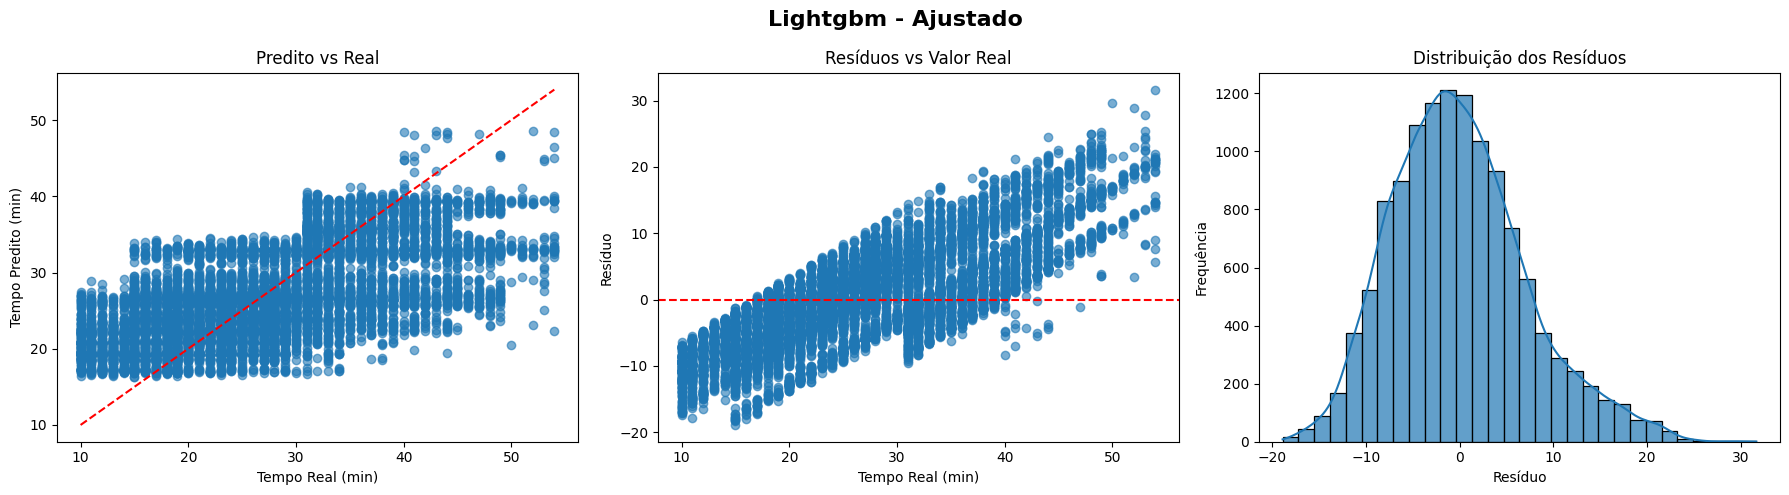

In [24]:
# Model e fit
model_ajus = lgb.LGBMRegressor(**study.best_params)

treinar_modelo(model_ajus, X_train, y_train, y_test, titulo='Lightgbm - Ajustado')

In [25]:
metrics.append(
    regression_metrics(
        modelo_nome='Lightgbm Ajustado',
        model=model_ajus,
        y_test=y_test,
        X_train=X_train
    )
)

df_metrics = pd.DataFrame(metrics)
df_metrics

,Modelo,MAE,MSE,RMSE,R²,R² Ajustado,MAPE (%),RMSLE
0,LinearRegression,6.213642,60.995872,7.809985,0.303867,0.302746,27.679355,0.091562
1,Lightgbm,5.717491,52.585675,7.251598,0.399851,0.398884,25.300403,0.079669
2,RandomForestRegressor,6.002406,58.321428,7.636847,0.334390,0.333318,26.576309,0.088093
3,Xgboost,5.711496,52.371284,7.236801,0.402298,0.401335,25.297874,0.079511
4,Catboost,5.762009,53.396737,7.307307,0.390594,0.389613,25.457983,0.080760
5,Lightgbm Ajustado,5.697678,52.155201,7.221856,0.404764,0.403805,25.350645,0.079475


In [26]:
# Função Objective
def objective(trial):
    params = {
        "objective": "reg:absoluteerror",
        "eval_metric": "mae",

        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 100),

        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),

        "gamma": trial.suggest_float("gamma", 0, 10),

        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),

        "tree_method": "hist",
        "verbosity": 0,
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)

    return mae

In [27]:
# Objeto de estudo, aqui queremos minimizar o MAE
study = optuna.create_study(direction = 'minimize')
study.optimize(objective, n_trials=30)

In [28]:
# Imprimi os melhores parâmetros e o melhor MAE
print('Melhores hiperparâmetros:', study.best_params)
print('Melhor MAE:', study.best_value)

Melhores hiperparâmetros: {'learning_rate': 0.04692953916407214, 'max_depth': 7, 'min_child_weight': 29, 'subsample': 0.7266578445108527, 'colsample_bytree': 0.947254840109181, 'gamma': 4.547535284745292, 'reg_alpha': 8.361577052224387, 'reg_lambda': 8.1200948868814}
Melhor MAE: 5.664004325866699


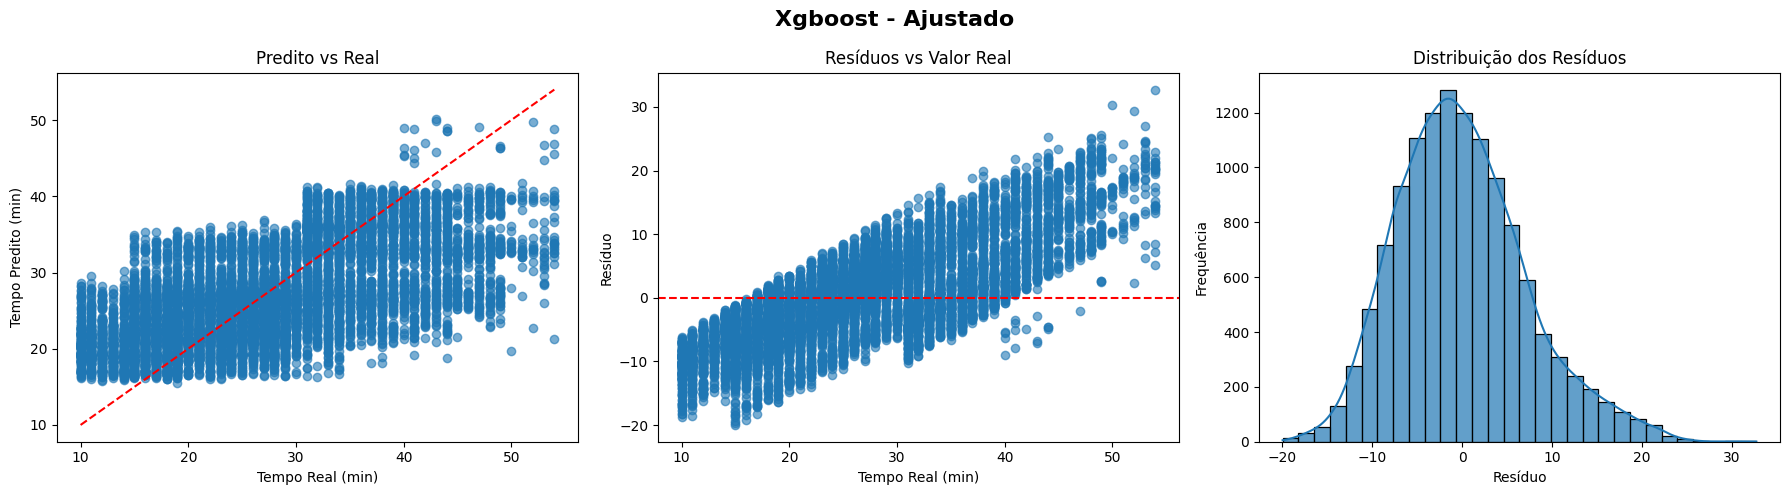

In [29]:
# Model e fit
model_xgb_ajus = xgb.XGBRegressor(**study.best_params)

treinar_modelo(model_xgb_ajus, X_train, y_train, y_test, titulo='Xgboost - Ajustado')

In [30]:
metrics.append(
    regression_metrics(
        modelo_nome='XGBoost Ajustado',
        model=model_xgb_ajus,
        y_test=y_test,
        X_train=X_train
    )
)

df_metrics = pd.DataFrame(metrics)
df_metrics

,Modelo,MAE,MSE,RMSE,R²,R² Ajustado,MAPE (%),RMSLE
0,LinearRegression,6.213642,60.995872,7.809985,0.303867,0.302746,27.679355,0.091562
1,Lightgbm,5.717491,52.585675,7.251598,0.399851,0.398884,25.300403,0.079669
2,RandomForestRegressor,6.002406,58.321428,7.636847,0.334390,0.333318,26.576309,0.088093
3,Xgboost,5.711496,52.371284,7.236801,0.402298,0.401335,25.297874,0.079511
4,Catboost,5.762009,53.396737,7.307307,0.390594,0.389613,25.457983,0.080760
5,Lightgbm Ajustado,5.697678,52.155201,7.221856,0.404764,0.403805,25.350645,0.079475
6,XGBoost Ajustado,5.715820,52.425510,7.240546,0.401679,0.400715,25.322958,0.079539


In [31]:
modelos_desejados = [
    'Lightgbm',
    'Xgboost',
    'Lightgbm Ajustado',
    'XGBoost Ajustado'
]

df_final = df_metrics[df_metrics['Modelo'].isin(modelos_desejados)]


In [32]:
df_compativo = df_final.drop(['RMSE', 'R²', 'R² Ajustado', 'RMSLE'], axis=1)

In [33]:
df_compativo.style.background_gradient(cmap='Blues').set_table_styles(
    [{
        'selector': 'th', # 'th' seleciona as células do cabeçalho
        'props': [('text-align', 'center')]
    }]
).set_properties(subset=['Modelo'],**{'text-align': 'center'})

,Modelo,MAE,MSE,MAPE (%)
1,Lightgbm,5.717491,52.585675,25.300403
3,Xgboost,5.711496,52.371284,25.297874
5,Lightgbm Ajustado,5.697678,52.155201,25.350645
6,XGBoost Ajustado,5.715820,52.425510,25.322958


Após o ajuste de hiperpâmetros o Lightgbm apresentou uma leve melhora dos resultados.

# 5 Conclusão
Este projeto serviu como estudo de caso para construção de um modelo utilizando técnicas de aprendizado de máquina, capaz de prever os tempos de entrega dos pedidos feito para serviços de delirevy, primeiramente foi feito uma limpeza dos dados quando foi constatado discrepâncias nos dados de latitude e longitude, que apresentavam valores negativos e próximo de zero, valores estes que estavam totalmente fora do escopo real dos dados.

Após a limpeza foi realizado uma análise explorátoria dos dados fornecendo insigths relavantes para o setor de delirevy, como quantidade de tipo de pedido, taxa de avaliação dos delivery, distância entre o restaurante e o local de entrega, idade e veículo dos entregadores (delivery). 

A construção de features veio em seguida, passo essencial na construção do modelo, aqui foi analisado dados que fossem relevantes para o objetivo deste projeto. Durante essa etapa foi verificado que os dados não continham informações sobre horário ou turno do dia que o pedido foi feito. Informação essa de extrema importância para um serviço de delivery, já que, por meio dela é possível criar um planejamento de rota, tipo de veículo mais adequado para o tipo de pedido feito, movimentação do trânsito no momento da entrega.

O estudo seguiu a para o treinamento do modelo, foi usado 5 modelos, todos com abordagens e métodos diferentes:
- Linear Regression
- Lightgbm
- Random Forest Regression
- XGBoost
- Catboost

Os resultados obtidos foram comparados buscando aquele que melhor atendesse ao objetivo final. Lightgbm e XGBoost tiveram os melhores resultados. Com a intenção de contornar o problema identificado da ausente do horário do pedido, foi feito um ajuste de hiperpâmetros nos modelos que tiveram melhor resultado. Porém, mesmo com essa estrágia a alteração no resultado foi de pouca valia, já houve apenas uma leve mudança de valores. 

Como recomendação final para este projeto seria conversar com o setor de negócio responsável pelo armazenamento dos dados e com o setor estrátegico da empresa para discutir planos de ação para melhorar a acurácia dos dados, planos de avaliação de rotas de acordo com o trânsito no momento que o pedido foi feito até a entrega, para que haja possibilidade de buscar novas variáveis ou novas variáveis derivadas que possam ser adicionadas aos modelos aumentando sua precisão.
